In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import myFunctions as mf
import importlib
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from dateutil import parser
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from dateutil import parser
import datetime

In [236]:
importlib.reload(mf)

<module 'myFunctions' from '/home/jovyan/Pstat134/Final Project/BasketballPlayoffs/myFunctions.py'>

In [237]:
plyrs = pickle.load(open( "allplayers.p", "rb" ))
plyrsreg = pickle.load(open("allplayersregular.p","rb"))
allshotspoff = pickle.load(open( "allshotspoff2017.p", "rb" ))
allshotsreg = pickle.load(open("allshotsreg2017.p","rb"))
PIDS = [i for i in plyrs.keys()]

In [238]:

aggregation = {'SHOT_ATTEMPTED_FLAG': {'TOTAL_SHOTS': 'sum'}}

playOffTeams = allshotspoff.TEAM_NAME.unique()
playOffNames = allshotspoff.PLAYER_NAME.unique()
teamTotalReg = allshotsreg[allshotsreg.TEAM_NAME.isin(playOffTeams)].groupby(['GAME_ID','TEAM_NAME']).agg(aggregation)
teamTotalPoff = allshotspoff.groupby(['GAME_ID','TEAM_NAME']).agg(aggregation)
teamTotalReg.columns = teamTotalReg.columns.droplevel(0)

teamTotalPoff.columns = teamTotalPoff.columns.droplevel(0)
teamTotalReg.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


TOTAL_SHOTS
GAME_ID    TEAM_NAME                         
0021800001 Boston Celtics                  96
           Philadelphia 76ers              83
0021800002 Golden State Warriors           95
           Oklahoma City Thunder           87
0021800003 Milwaukee Bucks                 78

In [239]:
plyrsTotalReg = allshotsreg[np.logical_and(allshotsreg.TEAM_NAME.isin(playOffTeams),allshotsreg.PLAYER_NAME.isin(playOffNames))].groupby(['GAME_ID','TEAM_NAME','PLAYER_NAME']).agg(aggregation)
plyrsTotalPoff = allshotspoff.groupby(['GAME_ID','TEAM_NAME','PLAYER_NAME']).agg(aggregation)
plyrsTotalReg


# Getting percentile shots
plyrsTotalReg['TEAM_TOTAL_SHOTS'] = teamTotalReg.TOTAL_SHOTS
plyrsTotalReg['PCT_SHOTS'] = plyrsTotalReg.SHOT_ATTEMPTED_FLAG.TOTAL_SHOTS.values / plyrsTotalReg.TEAM_TOTAL_SHOTS.values
plyrsTotalPoff['TEAM_TOTAL_SHOTS'] = teamTotalPoff.TOTAL_SHOTS
plyrsTotalPoff['PCT_SHOTS'] = plyrsTotalPoff.SHOT_ATTEMPTED_FLAG.TOTAL_SHOTS.values / plyrsTotalPoff.TEAM_TOTAL_SHOTS.values

#Shot Success percentile


In [285]:
## Getting percentile difference
meanPctReg = plyrsTotalReg.groupby('PLAYER_NAME').mean()
meanPctPoff = plyrsTotalPoff.groupby('PLAYER_NAME').mean()
sumTable = meanPctReg
sumTable["SHOTAVG"] = (allshotsreg[allshotsreg.PLAYER_NAME.isin(plyrInfoPoff["DISPLAY_FIRST_LAST"].values)].groupby(["PLAYER_NAME"])["SHOT_MADE_FLAG"].sum()/allshotsreg[allshotsreg.PLAYER_NAME.isin(plyrInfoPoff["DISPLAY_FIRST_LAST"].values)].groupby(["PLAYER_NAME"]).size()).values
sumTable['PCT_SHOTS_POFF'] = meanPctPoff.PCT_SHOTS.values
sumTable['PCT_DIFF'] = (meanPctPoff.PCT_SHOTS.values - meanPctReg.PCT_SHOTS.values)

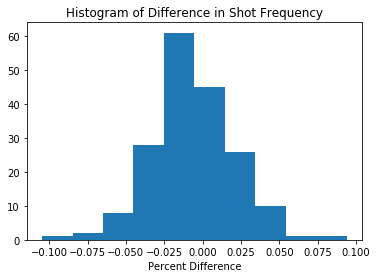

In [286]:
bins = plt.hist(sumTable.PCT_DIFF, bins = 10)
plt.xlabel("Percent Difference")
plt.title("Histogram of Difference in Shot Frequency")
plt.show()

In [287]:
def inBin(value, bins):
    if(value > bins[len(bins)-1]):
        return(bins[len(bins)-1])
    for i in range(len(bins)):
        if(value >= bins[i] and value <= bins[i+1]):
            return i

We see that the percent difference is approximately normal. Maybe the players on any given extreme share some kind of relationship?

      SHOTAVG PCT_SHOTS PCT_SHOTS_POFF
                                      
BIN                                   
0    0.530612  0.119403       0.014856
1    0.534232  0.117530       0.048756
2    0.443523  0.114196       0.058241
3    0.472574  0.096303       0.063083
4    0.472653  0.082209       0.068060
5    0.475717  0.110436       0.112695
6    0.453090  0.116462       0.141237
7    0.468233  0.137195       0.180090
8    0.549206  0.133893       0.188377
9    0.462670  0.173585       0.267405


In [307]:
plyrInfo = pickle.load(open('plyrinfo2017.p','rb'))

In [308]:
plyrInfoPoff = plyrInfo[plyrInfo.DISPLAY_FIRST_LAST.isin(playOffNames)]
plyrInfoPoff = plyrInfoPoff.sort_values("DISPLAY_FIRST_LAST")
plyrInfoPoff["PCT_DIFF"] = sumTable.PCT_DIFF.values

In [309]:
def ft2inches(value):
    if(value == ''):
        return np.NaN
    valuelist = value.split("-")
    return int(valuelist[0])*12+int(valuelist[1])
def yr2age(value):
    now = datetime.datetime.now()
    return(now.year - parser.parse(value).year)

In [312]:
X = pd.DataFrame(plyrInfoPoff[["HEIGHT","WEIGHT"]])
X["AGE"] = [yr2age(i) for i in plyrInfoPoff.BIRTHDATE]


Y = X.copy()
Y["PLAYER_NAME"]= plyrInfoPoff.DISPLAY_FIRST_LAST
for i in range(len(Y.WEIGHT)):
    if Y.WEIGHT.iloc[i] == '':
        print(Y.PLAYER_NAME.iloc[i])
        print(i)
    if Y.AGE.iloc[i] == '':
        print("AGE MISSING", Y.PLAYER_NAME.iloc[i],i)
X.WEIGHT.iloc[174] = 220
X.HEIGHT.iloc[174] = "6-6"
X.HEIGHT = [ft2inches(i) for i in X.HEIGHT]
X.WEIGHT = [int(i) for i in X.WEIGHT]

Tyreke Evans
174


In [313]:
X["SHOTAVG"] = sumTable.SHOTAVG.values
X["PCT_SHOTS_REG"] = sumTable.PCT_SHOTS.values
X["PCT_SHOTS_POFF"] = sumTable.PCT_SHOTS_POFF.values
X["PCT_SHOTS_DIFF"] = sumTable.PCT_DIFF.values

In [318]:
sumTable["BIN"] = [inBin(value = i,bins = bins[1]) for i in sumTable.PCT_DIFF]
print(sumTable[["BIN","SHOTAVG","PCT_SHOTS","PCT_SHOTS_POFF"]].groupby("BIN").mean())

      SHOTAVG PCT_SHOTS PCT_SHOTS_POFF
                                      
BIN                                   
0    0.487604  0.115035       0.060643
1    0.469347  0.095253       0.088005
2    0.463339  0.136631       0.177718


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


#### Analysis

We can see that the players who shot more than average shot even more during the playoffs and vice versa. Interestingly, the players who shot less have a higher than average shot made percentage.

Add More Pls

### Clustering and Linear Regression

In [319]:
model = LinearRegression()
xvalues = X[['AGE',"PCT_SHOTS_REG","SHOTAVG"]].values
yvalues = plyrInfoPoff.PCT_DIFF.values.reshape(-1,1)

model.fit(xvalues, yvalues)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [320]:
print(model.score(xvalues, yvalues))

# This value is 

0.0428029802795592


In [337]:
from sklearn.preprocessing import normalize
num = 4
clustering = AgglomerativeClustering(n_clusters = num, linkage = 'complete').fit(normalize(X[["AGE","SHOTAVG"]]))
clustering.labels_

array([0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0,
       2, 0, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       1, 2, 0, 2, 0, 3, 0, 0, 2, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2])

In [338]:
X["CLUSTER"] = clustering.labels_
Y = X.copy()
Y["PLAYER_NAME"] = plyrInfoPoff.DISPLAY_FIRST_LAST
Y["CLUSTER"] = clustering.labels_
print(Y)

     HEIGHT  WEIGHT  AGE   SHOTAVG  PCT_SHOTS_REG  PCT_SHOTS_POFF  \
171      81     220   24  0.449331       0.159684        0.152077   
344      78     225   26  0.423256       0.044294        0.011845   
216      82     245   33  0.535270       0.119526        0.147071   
10       81     220   29  0.433390       0.081935        0.076121   
314      80     215   27  0.487273       0.047348        0.039284   
243      81     240   32  0.503185       0.043042        0.024725   
131      83     279   26  0.533270       0.157957        0.148699   
222      78     215   35  0.500000       0.051833        0.090117   
34       82     260   33  0.470852       0.050834        0.021541   
402      76     200   27  0.405594       0.093577        0.074103   
424      82     230   23  0.562500       0.151995        0.112910   
182      82     250   30  0.461596       0.213848        0.211450   
299      87     290   31  0.615385       0.062808        0.063472   
53       80     216   30  0.496670

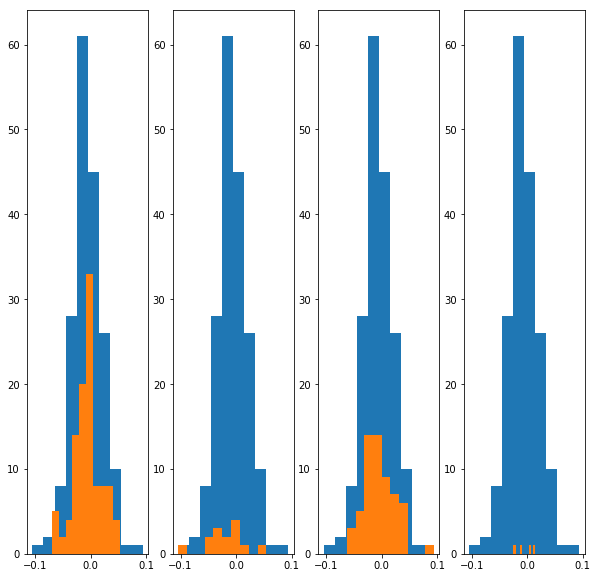

In [339]:
fig,ax = plt.subplots(ncols = num)
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(num):
    ax[i].hist(X.PCT_SHOTS_DIFF.values, bins = 10)
    ax[i].hist(X[X.CLUSTER == i].PCT_SHOTS_DIFF.values,bins = 10)

In [341]:
X.groupby("CLUSTER")[["AGE","SHOTAVG","PCT_SHOTS_REG"]].mean()

,AGE,SHOTAVG,PCT_SHOTS_REG
CLUSTER,,,
0,26.792453,0.472563,0.105012
1,25.000000,0.594315,0.104430
2,31.474576,0.425502,0.098995
3,23.000000,0.644048,0.055574


#### Analysis

Mostly inconclusive? maybe by playing around more and Jons domain knowledge more can be discovered

### Regression with more data

This whole thing is a pain and im not really sure what to do with it. Might scrap this part

In [95]:
plyrsTotalReg

SHOT_ATTEMPTED_FLAG  \
                                                           TOTAL_SHOTS   
GAME_ID    TEAM_NAME              PLAYER_NAME                            
0021800001 Boston Celtics         Al Horford                         7   
                                  Aron Baynes                        7   
                                  Gordon Hayward                    12   
                                  Jaylen Brown                      13   
                                  Jayson Tatum                      17   
                                  Kyrie Irving                      14   
                                  Marcus Morris                     12   
                                  Marcus Smart                       4   
                                  Terry Rozier                      10   
           Philadelphia 76ers     Amir Johnson                       1   
                                  Ben Simmons                       14   
                                  JJ Redick                         17   
                                  Joel Embiid                       21   
                                  T.J. McConnell                     5   
0021800002 Golden State Warriors  Alfonzo McKinnie                   1   
                                  Andre Iguodala                     2   
                                  Damian Jones                       7   
                                  Draymond Green                     6   
                                  Kevin Durant                      21   
                                  Kevon Looney                      11   
                                  Klay Thompson                     20   
                                  Quinn Cook                         2   
                                  Shaun Livingston                   5   
                                  Stephen Curry                     20   
           Oklahoma City Thunder  Dennis Schroder                   19   
                                  Jerami Grant                       7   
                                  Nerlens Noel                       2   
                                  Paul George                       23   
                                  Raymond Felton                     5   
                                  Steven Adams                      12   
...                                                                ...   
0021801227 San Antonio Spurs      Patty Mills                        5   
                                  Rudy Gay                          10   
0021801228 Denver Nuggets         Gary Harris                       11   
                                  Jamal Murray                      12   
                                  Malik Beasley                     10   
                                  Mason Plumlee                      2   
                                  Monte Morris                       8   
                                  Nikola Jokic                      26   
                                  Paul Millsap                       7   
                                  Torrey Craig                       1   
                                  Will Barton                       10   
0021801229 LA Clippers            Danilo Gallinari                  11   
                                  Garrett Temple                     4   
                                  Ivica Zubac                       13   
                                  JaMychal Green                     9   
                                  Lou Williams                      17   
                                  Montrezl Harrell                  13   
                                  Patrick Beverley                   9   
                                  Tyrone Wallace                     3   
                                  Wilson Chandler                    3   
           Utah Jazz              Ekpe Udoh            

In [153]:
plyrsIndReg = plyrsTotalReg.reset_index()
plyrsIndReg = plyrsIndReg[plyrsIndReg.PLAYER_NAME.isin(playOffNames)]
plyrsIndReg = plyrsIndReg.reset_index()
plyrsIndReg["GAME_NUM"] = 0
def gameSort(player, allshotsreg, newdf):
    tmp = newdf[newdf["PLAYER_NAME"] == player].copy()
    id2date = {}
    gameIDs = tmp["GAME_ID"].unique()
    order = np.argsort(gameIDs)
    for i in range(len(order)):
        id2date[gameIDs[i]] = order[i]
    tmp["GAME_NUM"] = [id2date[i] for i in newdf[newdf["PLAYER_NAME"] == player]["GAME_ID"].values]
    return(tmp)

In [154]:
regdf = pd.DataFrame(columns = plyrsIndReg.columns)
for i in playOffNames:
    tmp = gameSort(i, allshotsreg[allshotsreg.isin(playOffNames)], plyrsIndReg)
    regdf.append(tmp)

regdf

,index,GAME_ID,TEAM_NAME,PLAYER_NAME,SHOT_ATTEMPTED_FLAG,TEAM_TOTAL_SHOTS,PCT_SHOTS,GAME_NUM
,,,,,TOTAL_SHOTS,,,


In [155]:
regdf

,index,GAME_ID,TEAM_NAME,PLAYER_NAME,SHOT_ATTEMPTED_FLAG,TEAM_TOTAL_SHOTS,PCT_SHOTS,GAME_NUM
,,,,,TOTAL_SHOTS,,,
